# Analysis of Residential PV Power Plant Data: Self Consumption and Cost Saving

## Introduction

In this project, we analyze the data obtained from the Open-source PV Power Databases available at www.tudelft.nl. Specifically, we downloaded the Residential PV Power Plant data, which includes information about the time and PV production in watts (W).

## Data Description

The dataset consists of two columns:

- Time: This column represents the timestamp of each data point. Data is recorded for one year (2022) at 15min timestamp> Please note that the data for the month of december is not complete 
- PV Productie (W): This column indicates the power output of the residential PV power plant in watts (W) at each corresponding timestamp.

## Importing the Libraries and Loading the data

This section focuses on importing the necessary libraries for data analysis and visualization in the Jupyter Notebook.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import pyplot
import statsmodels.api as sm
import scipy.stats as scs
from numpy import array
import seaborn as sns

df = pd.read_csv("Data/2022_15min_data.csv")
df.head()

,Time,PV Productie (W)
0,2021-12-26 00:00:00,0.0
1,2021-12-26 00:15:00,0.0
2,2021-12-26 00:30:00,0.0
3,2021-12-26 00:45:00,0.0
4,2021-12-26 01:00:00,0.0


## Checking for Missing Values and Descriptive Statistics

To ensure data integrity, it's important to check for missing values in the dataset. 

In [7]:
missing_values = df.isnull().sum() 
print("There are", missing_values.sum(), "missing values in the dataset.")

There are 0 missing values in the dataset.


The above result indicates that there are no missing values in the dataset. This suggests that the data is complete and there are no gaps that need to be addressed before proceeding with further analysis.

In [8]:
df.describe() #Descriptive statistics provide a summary of the main characteristics of the dataset

,PV Productie (W)
count,33600.000000
mean,270.817604
std,489.592830
min,0.000000
25%,0.000000
50%,0.000000
75%,298.997025
max,2756.399200


- The mean value is 270.817604, representing the average PV power production in watts (W). 
- Standard deviation indicates the fluctuation or volatility in the PV power output. A higher standard deviation suggests greater variability, which can impact system stability and require additional measures to manage power fluctuations. 
- We can notice that that the minimum is 0: This information is crucial to identify periods of low or zero power generation, which may affect system reliability and necessitate alternative power sources. 
- The minimum of 0.0 signifies instances where the PV power production was zero, indicating periods of no power generation.
- The 25th percentile of 0.0suggests that 25% of the recorded instances had PV power production below or equal to zero.
- The median of 0.0 indicates that half of the recorded instances had PV power production below or equal to zero.
- The 75th percentile of 298.99 suggests that 75% of the recorded instances had PV power production below or equal to 298.997025 watts.
- The maximum of 2756.39 represents the highest recorded PV power production, indicating the peak power output achieved by the residential PV power plant.

## Visualizing Solar PV Energy Production over Time

In this section, the solar PV energy production over time is visualized using a line plot. The line plot provides a visual representation of the solar PV energy production trends, allowing for an intuitive understanding of the variation and patterns over the recorded time period.

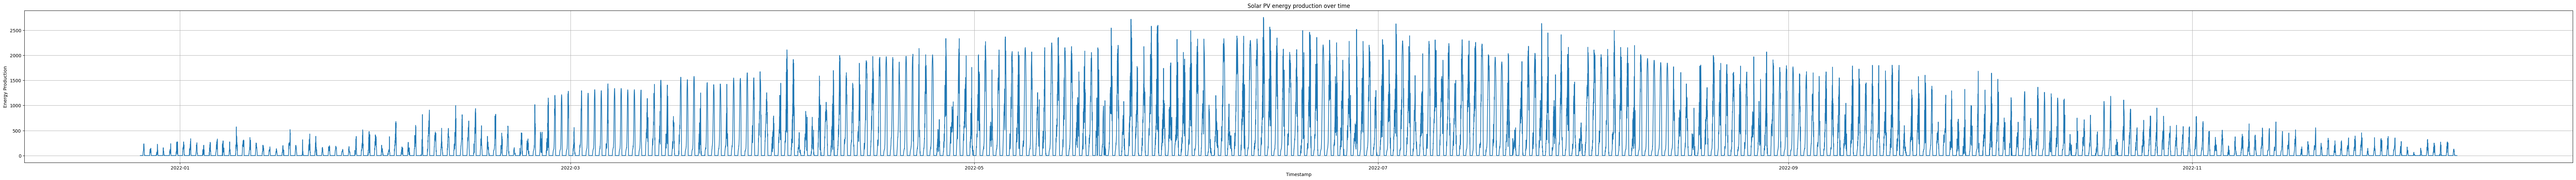

In [9]:
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time',inplace = True)
plt.figure(figsize=(100,6))
plt.plot(df.index, df["PV Productie (W)"])

plt.xlabel('Timestamp')
plt.ylabel('Energy Production')
plt.title('Solar PV energy production over time')
plt.grid(True)
plt.show()


Line plot reveals lower energy production during certain periods, specifically from January to March and from September to December. These dips in energy production are attributable to factors such as seasonal variation, weather conditions, sun position, and maintenance activities. Understanding these seasonal variations is crucial for making informed decisions regarding PV plant purchase and managing expectations regarding energy generation during specific months. 

##  Daily, Weekly and Monthly Aggregation of Solar PV Energy Production
By examining this plot, you can discern the trends and fluctuations in the daily, weekly and montly energy production of the PV plant. This information can be valuable when assessing the system's performance, identifying any irregularities or anomalies, and evaluating its suitability for meeting your energy requirements on a day-to-day, weekly and montly basis. 

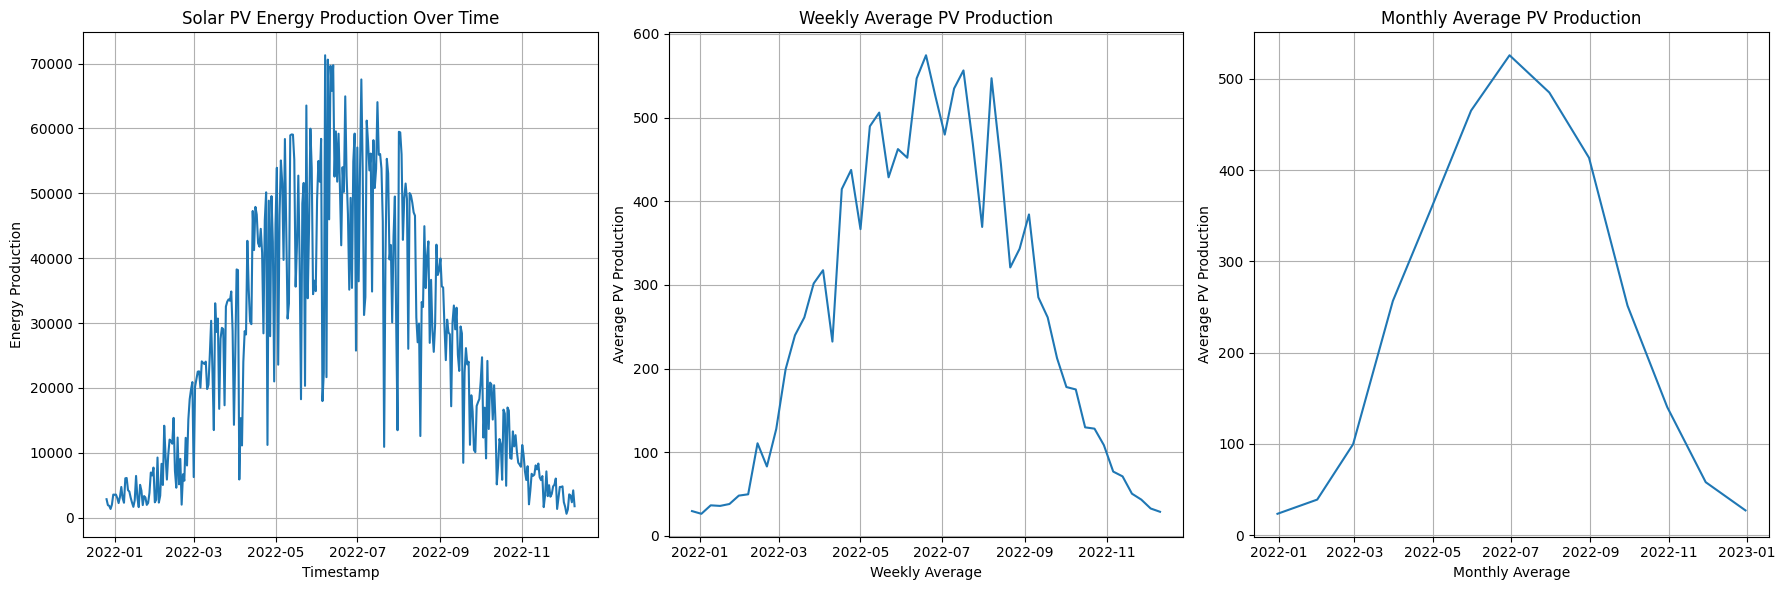

In [10]:
# Resampling to daily frequency
df_daily = df.resample('D').sum()

# Resampling to weekly frequency
weekly_mean = df.resample('W').mean()

# Resampling to monthly frequency
monthly_mean = df.resample('M').mean()

# Creating a single figure to display all plots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plotting solar PV energy production over time
axs[0].plot(df_daily.index, df_daily["PV Productie (W)"])
axs[0].set_xlabel('Timestamp')
axs[0].set_ylabel('Energy Production')
axs[0].set_title('Solar PV Energy Production Over Time')
axs[0].grid(True)

# Plotting weekly average PV production
axs[1].plot(weekly_mean.index, weekly_mean["PV Productie (W)"])
axs[1].set_xlabel('Weekly Average')
axs[1].set_ylabel('Average PV Production')
axs[1].set_title('Weekly Average PV Production')
axs[1].grid(True)

# Plotting monthly average PV production
axs[2].plot(monthly_mean.index, monthly_mean["PV Productie (W)"])
axs[2].set_xlabel('Monthly Average')
axs[2].set_ylabel('Average PV Production')
axs[2].set_title('Monthly Average PV Production')
axs[2].grid(True)

# Adjusting spacing between subplots
plt.tight_layout()

# Displaying the figure with all plots
plt.show()


## Analyzing Representative Day Profiles for Each Month

In this section, we investigate the representative day profiles for each month of the year in the solar PV energy production dataset. By extracting the average PV production for different times of the day, we can observe the variations in energy generation throughout the year. The presented figure provides a visual representation of the representative day profiles for each month, enabling consumers to compare and analyze the monthly variations in solar PV energy production.

C:\Users\Harpreet Singh\AppData\Local\Temp\ipykernel_28532\2219612406.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['Time'] = month_data['Time'].dt.time.apply(lambda x: x.strftime('%H:%M'))
C:\Users\Harpreet Singh\AppData\Local\Temp\ipykernel_28532\2219612406.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['Time'] = month_data['Time'].dt.time.apply(lambda x: x.strftime('%H:%M'))
C:\Users\Harpreet Singh\AppData\Local\Temp\ipykernel_28532\2219612406.py:12: SettingWithCopyWarn

          Month 1  Month 2  Month 3  Month 4  Month 5  Month 6  Month 7  \
00:00:00      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
00:15:00      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
00:30:00      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
00:45:00      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
01:00:00      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...           ...      ...      ...      ...      ...      ...      ...   
22:45:00      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
23:00:00      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
23:15:00      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
23:30:00      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
23:45:00      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

          Month 8  Month 9  Month 10  Month 11  Month 12  
00:00:00      0.0      0.0       0.0    

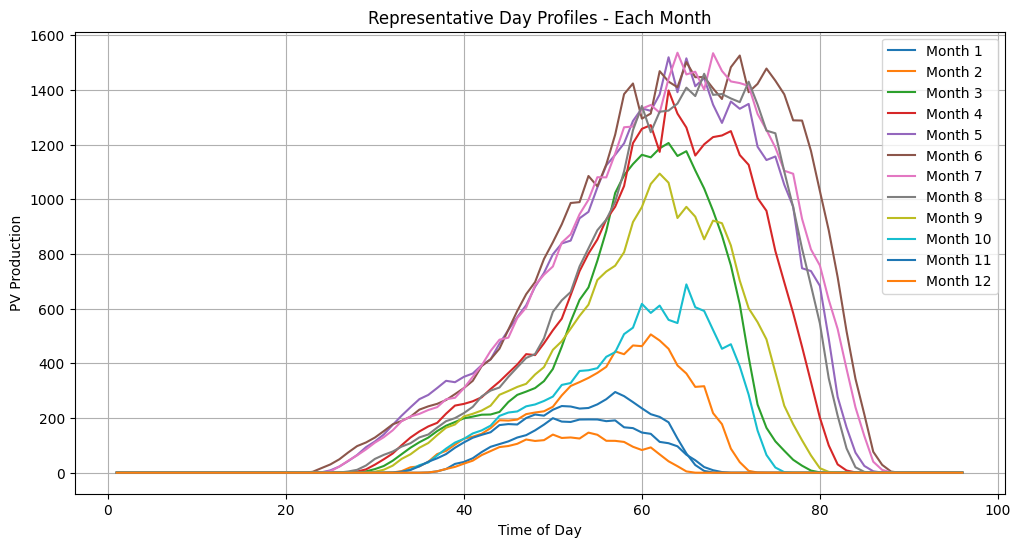

In [11]:
# Initialize an empty DataFrame to store the monthly representative day profiles
monthly_profiles = pd.DataFrame()

df = df.reset_index()

# Iterate over each month
for month in range(1, 13):
    # Filter data for the current month
    month_data = df[df['Time'].dt.month == month]

    # Extract the time component as a string
    month_data['Time'] = month_data['Time'].dt.time.apply(lambda x: x.strftime('%H:%M'))

    # Group data by time of day and calculate average PV production
    hourly_averages = month_data.groupby(month_data['Time'])['PV Productie (W)'].mean()

    # Append the monthly representative day profile to the DataFrame
    monthly_profiles[f'Month {month}'] = hourly_averages.values

# Convert the DataFrame index to represent the 96 time blocks
monthly_profiles.index = pd.date_range(start='00:00', end='23:45', freq='15min').time

# Print the monthly representative day profiles DataFrame
print(monthly_profiles)

# Generate numbers from 1 to 96 for x-axis labels
x_labels = list(range(1, 97))

# Plot the representative day profiles for each month
plt.figure(figsize=(12, 6))

for month in range(1, 13):
    plt.plot(x_labels, monthly_profiles[f'Month {month}'], label=f'Month {month}')

plt.xlabel('Time of Day')
plt.ylabel('PV Production')
plt.title('Representative Day Profiles - Each Month')
plt.grid(True)
plt.legend()
plt.show()


# Loading the load profile 

In this section, typical consumer load profile data is loaded, which represents the variation in electricity load over a period of time. The load profile data is provided in a CSV file, with two columns: timestamps and load values in percentage. By multiplying the nominal load of a house by the load profile values, consumers can estimate their actual load demand.

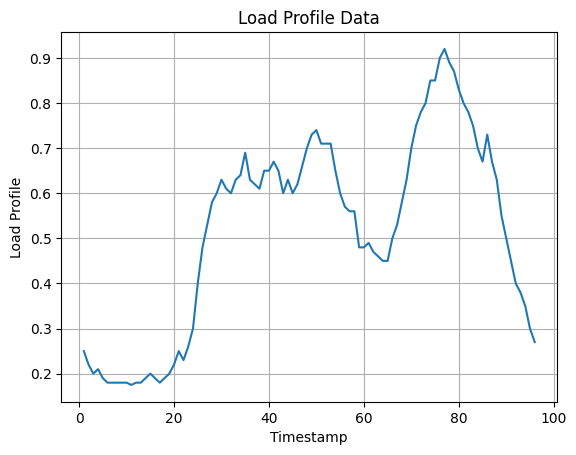

In [12]:
load = pd.read_csv("Data/load_profile.csv")
# Extract the timestamp and load profile columns
timestamp = load.iloc[:, 0]
load_profile = load.iloc[:, 1]

# Plot the load profile
plt.plot(timestamp, load_profile)
plt.xlabel('Timestamp')
plt.ylabel('Load Profile')
plt.title('Load Profile Data')
plt.grid(True)
plt.show()

## Comparing PV Profiles with Load Data for All Months

In this section, PV profiles obtained from the representative day profiles analysis with the load data for all months are compared with each other. By visualizing the PV profiles and load data on a single graph, consumers can assess the correlation between solar PV energy production and electricity demand. 

**Note:** The comparison is just to get an idea of how generation vs demand is going to look like for a typical day in each month

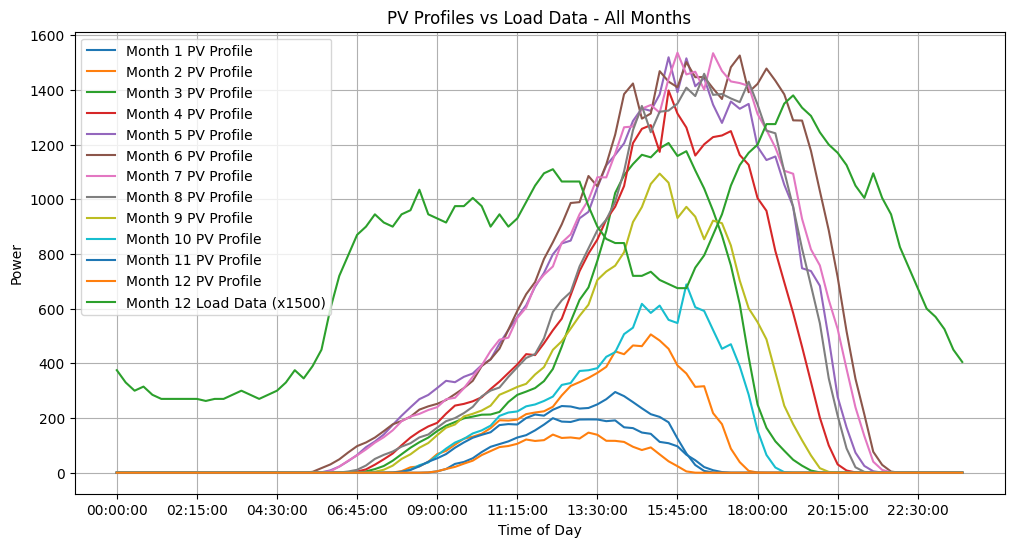

In [13]:
num_labels = 10

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Iterate over each month in the dataframe
for month in range(1, 13):
    # Get the PV profile for the current month
    pv_profile = monthly_profiles[f'Month {month}']

    # Convert the index of the PV profile to string representation
    pv_profile.index = [str(time) for time in pv_profile.index]

    # Plot the PV profile and load data for the current month
    ax.plot(pv_profile.index, pv_profile, label=f'Month {month} PV Profile')
    
# Load the load data for the current month
load_data = load['load'] * 1500 #Considering 1.5KW as the nominal load of the residential consumer
ax.plot(load_data, label=f'Month {month} Load Data (x1500)')    

ax.set_xlabel('Time of Day')
ax.set_ylabel('Power')
ax.set_title('PV Profiles vs Load Data - All Months')
ax.grid(True)
ax.legend()

# Limit the number of x-axis labels
x_labels = pv_profile.index[::int(len(pv_profile.index) / num_labels)]
ax.set_xticks(x_labels)

plt.show()

## Financial Evaluation of Solar PV System Revenue Components
The following code performs a financial evaluation of a solar photovoltaic (PV) system by calculating the revenue components for each month and assessing the financial implications. The analysis includes the calculation of three revenue components, operating profit, original bill, net payment to the grid, and savings on the original bill.

### Methodology: 

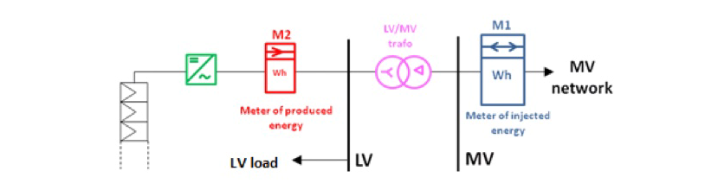

#### 1. Definition of a few Parameters
- The time interval is set to 15 minutes.
- The FIP price (Feed-in Premium) is defined as €0.314 per kWh.
- The transformer loss and loss factor are set as 1.5% and 2.3% respectively.
- The electricity price is set as €0.210 per kWh.
- The average market price is defined as €0.04786 per kWh.
- The nominal load scaling factor is 1.5kW
- The code iterates over each month from January to December.

#### 2. Calculation of First Revenue Component: 

The first revenue component (R1) is calculated by multiplying the energy generation by the FIP price. FIP or FIT are the financial instruments that promotes the generation of renewable energy by offering financial incentives to individuals or organizations that generate electricity from renewable sources. FIP, in this context, refers to the premium or additional payment per kilowatt-hour (kWh) of energy generated by the solar PV system, regardless of how much energy is actually injected back into the grid. Unlike FIT (Feed-in Tariff), which provides a fixed payment per kWh of electricity fed back into the grid, FIP focuses on the energy generation itself rather than the amount injected.

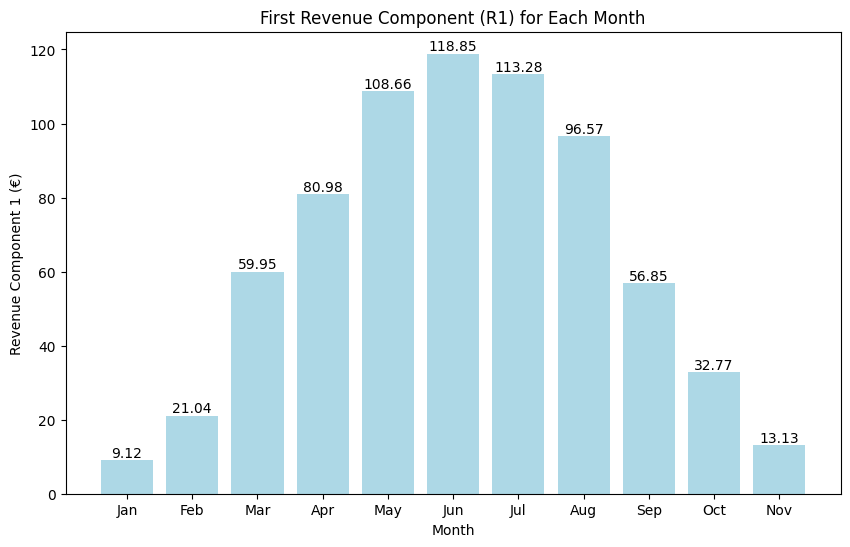

In [16]:
import matplotlib.pyplot as plt

# Define the time interval in minutes
time_interval_minutes = 15

# Define the FIP price in euro/kWh
FIP_price = 0.314

# Create an empty list to store the revenue components for each month
revenue_components = []

# Iterate over each month
for month in range(1, 12):
    # Filter the data for the current month
    month_data = df[df['Time'].dt.month == month]
    
    # Calculate the energy generation in kWh for the current month
    month_profile_kWh = month_data['PV Productie (W)'] * (time_interval_minutes / 60) / 1000
    
    # Calculate the total energy generation (Epnet) in kilowatt-hours (kWh) for the current month
    Epnet_kWh = month_profile_kWh.sum()
    
    # Calculate the first revenue component (R1) for the current month
    R1 = Epnet_kWh * FIP_price
    
    # Append the revenue component to the list
    revenue_components.append(R1)

# Create a list of month labels
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']

# Plot the revenue components
plt.figure(figsize=(10, 6))
plt.bar(month_labels, revenue_components, color='lightblue')
plt.xlabel('Month')
plt.ylabel('Revenue Component 1 (€)')
plt.title('First Revenue Component (R1) for Each Month')

# Add data point labels
for i, value in enumerate(revenue_components):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

plt.show()


#### 3. Calculation of Second Revenue Component: 

The second revenue component (R2) is calculated by considering the difference between PV generation and load, accounting for transformer loss and loss factor, and multiplying it by the average market price. Considering the 100% self consumtion, The difference between PV and load is positive only in months where there is surplus of energy that is generated by the PV compared to the load during the PV window. 

**Why Transformer Loss**: Transformer losses refer to the energy that is dissipated as heat during the process of stepping up or stepping down the voltage of electricity. Transformers are used to adjust the voltage levels of electricity to facilitate efficient transmission and distribution.

**Why Loss Factor**: In the power grid, electricity is generated at power plants located at different distances from consumers. When electricity is transmitted over long distances, some of it is lost due to factors like resistance in transmission lines. The loss factor takes into account these losses.In our case, we're using solar PV systems that generate electricity locally. Since the electricity doesn't have to travel long distances, there are fewer losses. The loss factor helps to recognize this advantage and increase the revenue for local energy producers. By considering the loss factor, we can calculate a higher revenue for local energy production. It recognizes the value of generating energy nearby and encourages more people to adopt solar PV systems. So, it's a way to reward and incentivize local energy production by acknowledging the avoided losses that would occur in a centralized system.

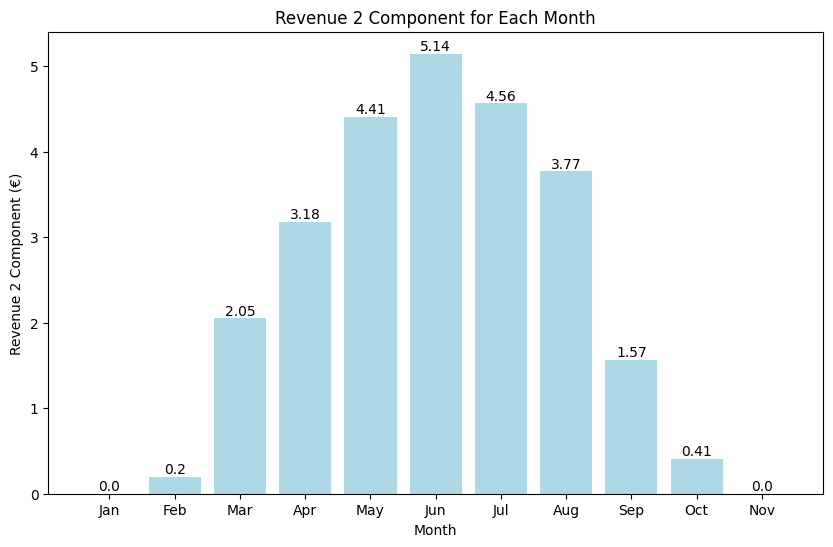

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the time interval in minutes
time_interval_minutes = 15
average_market_price = 0.047
# Define the transformer loss percentage and loss factor
transformer_loss = 0.015  # 1.5%
loss_factor = 0.023  # 2.3%

# Create an empty list to store the revenue 2 components for each month
R2_list = []

# Iterate over all months
for month in range(1, 12):
    # Filter the data for the current month
    month_data = df[df['Time'].dt.month == month]

    # Calculate the energy generation in kWh for the current month
    month_profile_kWh = month_data['PV Productie (W)'] * (time_interval_minutes / 60) / 1000

    # Repeat the load kWh values for the current month
    load_kWh = np.tile(load['load'].values * 1500 * (time_interval_minutes / 60) / 1000, len(month_profile_kWh) // len(load['load']))

    # Calculate the energy injected to the grid for each time block
    Einj = (month_profile_kWh - load_kWh) * (1 - transformer_loss) * (1 + loss_factor)

    # Calculate the revenue 2 component for the current month
    R2 = Einj[Einj > 0].sum() * average_market_price

    # Append the revenue 2 component to the list
    R2_list.append(R2)

# Create a list of month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']

# Create a DataFrame with month names and revenue 2 component values
data = pd.DataFrame({'Month': month_names, 'R2': R2_list})

# Plot the revenue 2 component
plt.figure(figsize=(10, 6))
plt.bar(data['Month'], data['R2'], color='lightblue')
plt.xlabel('Month')
plt.ylabel('Revenue 2 Component (€)')
plt.title('Revenue 2 Component for Each Month')

# Add data point values above each bar
for i, value in enumerate(data['R2']):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

plt.show()


#### 4. Calculation of Third Revenue Component

The third component represents the amount of self-consumed energy, which refers to the energy generated by the solar PV system that is directly used by the consumer without being exported to the grid. This self-consumed energy helps offset the electricity consumption from the grid, resulting in cost savings for the consumer.To calculate the cost savings, the self-consumed energy is multiplied by the electricity price, which represents the cost per kilowatt-hour (kWh) charged by the utility company for electricity consumption. This calculation reflects the amount of money that the consumer would have spent on purchasing electricity from the grid if they did not have a solar PV system.

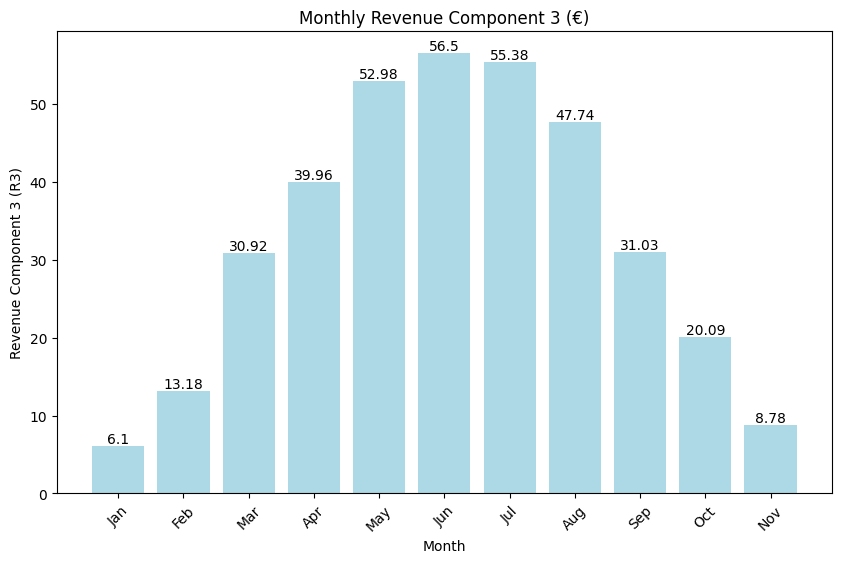

In [20]:
revenue_component_3 = []

# Iterate over each month
for month in range(1, 12):
    month_data = df[df['Time'].dt.month == month]
    month_profile_kWh = month_data['PV Productie (W)'] * (time_interval_minutes / 60) / 1000
    Epnet_kWh = month_profile_kWh.sum()
    
    load_kWh = np.tile(load['load'].values * 1500 * (time_interval_minutes / 60) / 1000, len(month_profile_kWh) // len(load['load']))
    Einj = (month_profile_kWh - load_kWh) * (1 - transformer_loss) * (1 + loss_factor)
    Einj_cumulative = Einj[Einj > 0].sum()
    
    self_consumed_energy = Epnet_kWh - Einj_cumulative
    electricity_price = 0.210
    R3 = self_consumed_energy * electricity_price
    
    revenue_component_3.append(R3)

# Plot the bar chart with data points
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']
plt.figure(figsize=(10, 6))
plt.bar(months, revenue_component_3, color='lightblue')
plt.xlabel('Month')
plt.ylabel('Revenue Component 3 (R3)')
plt.title('Monthly Revenue Component 3 (€)')
plt.xticks(rotation=45)
for i, value in enumerate(revenue_component_3):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')
plt.show()


#### 5. Cost Saving
The original bill is calculated by summing up the load data multiplied by the electricity price.
Net payment to the grid is determined by considering the difference between total energy consumption and self-consumed energy, multiplied by the electricity price, and subtracting the total revenue.
Savings on the original bill is calculated as the difference between the original bill and the net payment to the grid.

Month: 1
Total Revenue: 15.215025129999999
Operating Profit: []
Original Bill: 121.39115625000002
Net Payment to Grid: 100.07850654500002
Saving on Original Bill: 21.312649705

Month: 2
Total Revenue: 35.500585386954405
Operating Profit: []
Original Bill: 109.64362499999999
Net Payment to Grid: 60.96658633600587
Saving on Original Bill: 48.67703866399412

Month: 3
Total Revenue: 103.97934904617172
Operating Profit: []
Original Bill: 121.39115625000002
Net Payment to Grid: -13.504924467471028
Saving on Original Bill: 134.89608071747105

Month: 4
Total Revenue: 141.21954380832685
Operating Profit: []
Original Bill: 117.4753125
Net Payment to Grid: -63.70005737378092
Saving on Original Bill: 181.17536987378094

Month: 5
Total Revenue: 189.76707412077457
Operating Profit: []
Original Bill: 121.39115625000002
Net Payment to Grid: -121.35348773785053
Saving on Original Bill: 242.74464398785057

Month: 6
Total Revenue: 208.18724737785158
Operating Profit: []
Original Bill: 117.4753125
Net Pay

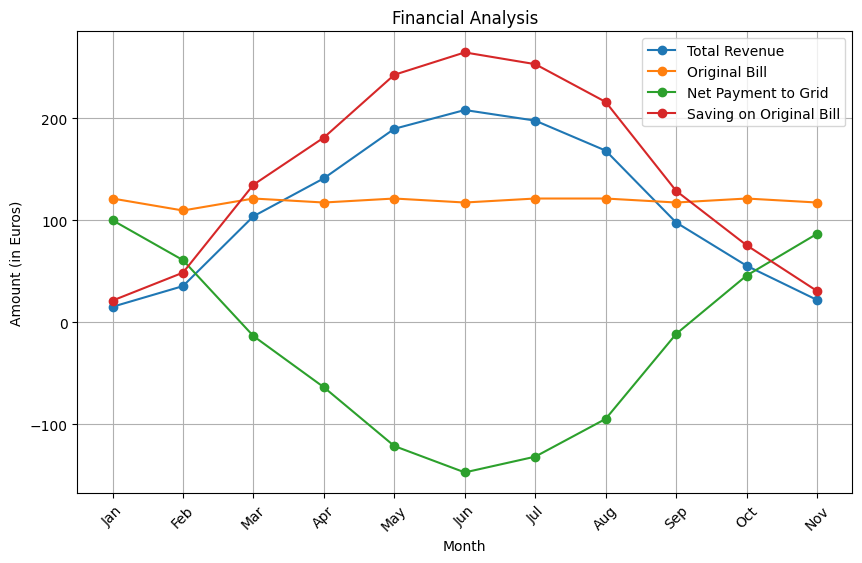

In [22]:
total_revenues = []
operating_profits = []
original_bills = []
net_payments_to_grid = []
savings_on_original_bills = []

# Iterate over each month
for month in range(1, 12):
    month_data = df[df['Time'].dt.month == month]
    month_profile_kWh = month_data['PV Productie (W)'] * (time_interval_minutes / 60) / 1000
    Epnet_kWh = month_profile_kWh.sum()
    
    
    load_kWh = np.tile(load['load'].values * 1500 * (time_interval_minutes / 60) / 1000, len(month_profile_kWh) // len(load['load']))
    Einj = (month_profile_kWh - load_kWh) * (1 - transformer_loss) * (1 + loss_factor)
    Einj_cumulative = Einj[Einj > 0].sum()
    
    self_consumed_energy = Epnet_kWh - Einj_cumulative
    electricity_price = 0.210
    R1 = Epnet_kWh * FIP_price
    R2 = Einj_cumulative * average_market_price
    R3 = self_consumed_energy * electricity_price
    
    total_revenue = R1 + R2 + R3
    total_revenues.append(total_revenue)
    
    Cbill = 0.210

    E_consumption = load_kWh.sum()
    
    Original_Bill = E_consumption * Cbill
    original_bills.append(Original_Bill)
    
    E_withdrawn_from_grid = E_consumption - self_consumed_energy
    net_payment_to_grid = (E_withdrawn_from_grid * Cbill) - total_revenue
    net_payments_to_grid.append(net_payment_to_grid)
    
    Saving_on_Original_Bill = Original_Bill - net_payment_to_grid
    savings_on_original_bills.append(Saving_on_Original_Bill)

    # Print the results for the current month
    print("Month:", month)
    print("Total Revenue:", total_revenue)
    print("Operating Profit:", operating_profits)
    print("Original Bill:", Original_Bill)
    print("Net Payment to Grid:", net_payment_to_grid)
    print("Saving on Original Bill:", Saving_on_Original_Bill)
    print("")

# Plot the results
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']
plt.figure(figsize=(10, 6))
plt.plot(months, total_revenues, marker='o', label='Total Revenue')
plt.plot(months, original_bills, marker='o', label='Original Bill')
plt.plot(months, net_payments_to_grid, marker='o', label='Net Payment to Grid')
plt.plot(months, savings_on_original_bills, marker='o', label='Saving on Original Bill')
plt.xlabel('Month')
plt.ylabel('Amount (in Euros)')
plt.title('Financial Analysis')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


6. ARIMA Modelling for forecast

The Augmented Dickey-Fuller (ADF) test is a statistical hypothesis test used to determine whether a unit root is present in a time series dataset. The presence of a unit root indicates that a time series is non-stationary, meaning its statistical properties, such as mean and variance, change over time. Property of stationarity is crucial for many time series modeling techniques, including ARIMA and SARIMA models.

In [29]:
from statsmodels.tsa.stattools import adfuller
# Extract the time series data
time_series = df.set_index('Time')['PV Productie (W)']

result = adfuller(time_series)
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']

for value, label in zip(result, labels):
    print(f'{label}: {value}')

if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis. Reject the null hypothesis. Data has no unit root and is stationary.")
else:
    print("Weak evidence against null hypothesis. Time series has a unit root, indicating it is non-stationary.")


Augmented Dickey-Fuller Test:
ADF Test Statistic: -29.734222112109517
p-value: 0.0
#Lags Used: 43
Number of Observations Used: 33556
Strong evidence against the null hypothesis. Reject the null hypothesis. Data has no unit root and is stationary.


In the data preparation phase, the data is formatted to ensure its suitability for modeling. It is then divided into training (80%) and testing (20%) sets. Utilizing the auto_arima function from the pmdarima library, optimal ARIMA parameters are automatically determined based on criteria such as AIC. These parameters are applied to fit a Seasonal Autoregressive Integrated Moving Average with Exogenous Factors (SARIMAX) model, incorporating seasonal components. The model's performance is evaluated on the testing set using Mean Squared Error (MSE). Finally, the actual PV production values and predicted values generated by the SARIMAX model are visualized to assess how well the model captures data patterns

In [ ]:
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Assuming 'time_series' is your original time series data

# Split the data into training and testing sets
train_size = int(len(time_series) * 0.8)  # 80% for training
train, test = time_series[:train_size], time_series[train_size:]

# Use auto_arima to find the best ARIMA parameters
autoarima_model = pm.auto_arima(train, seasonal=True, m=96)  # m is the seasonal cycle, assuming 96 data points per day

# Get the best order parameters
best_order = autoarima_model.get_params()['order']
best_seasonal_order = autoarima_model.get_params()['seasonal_order']

# Fit the SARIMAX model on the training set with the best parameters
sarimax_model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
fit_model = sarimax_model.fit(disp=False)

# Make predictions on the testing set
forecast_steps = len(test)
predicted_values = fit_model.get_forecast(steps=forecast_steps).predicted_mean

# Evaluate the model performance using Mean Squared Error (MSE)
mse = mean_squared_error(test, predicted_values)
print(f'Mean Squared Error (MSE): {mse}')

# Visualize actual vs predicted values
plt.plot(train.index, train, label='Training Set')
plt.plot(test.index, test, label='Testing Set')
plt.plot(test.index, predicted_values, label='Predicted', linestyle='dashed', color='red')
plt.xlabel('Time')
plt.ylabel('PV Production')
plt.title('SARIMAX Model: Actual vs Predicted')
plt.legend()
plt.show()